In [94]:
# Python Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import os

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding and Exploration

In [95]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [96]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [97]:
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 2. Data Cleaning

In [98]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [99]:
#Dropping rows in which all the records are blank/null
housing=housing.dropna(how='all')


In [100]:
housing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [101]:
##Dropping rows in which  'LotFrontage' is null as it is required for analysis
housing = housing[pd.notnull(housing['LotFrontage'])]

In [102]:
##Dropping rows in which  'MasVnrArea' is null as it is required for analysis
housing = housing[pd.notnull(housing['MasVnrArea'])]

In [103]:
##Dropping rows in which  'GarageYrBlt' is null as it is required for analysis
housing = housing[pd.notnull(housing['GarageYrBlt'])]

In [104]:
# Creating a new variable 'house_age' by using 'YearBuilt' column.
# this new coulmn can be used in the analysis to know the age of the house
housing['house_age']=2020-housing['YearBuilt']

In [105]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,17
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,44
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,105
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,21
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,42
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,79
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,70


### Handling Date variables

In [124]:
# Converting the date variable to date format 
housing['YearBuilt'] = pd.to_datetime(housing['YearBuilt'], , format='%d%%d', errors='ignore')
housing['earliest_cr_line'] = pd.to_datetime(housing['YearRemodAdd'], errors='ignore')
housing['last_pymnt_d'] = pd.to_datetime(housing['YrSold'], errors='ignore')
housing['last_credit_pull_d'] = pd.to_datetime(housing['GarageYrBlt'], errors='ignore')

In [ ]:
housing.LotFrontage.isnull().sum()

In [ ]:
housing.describe()

## Check if the target variable 'salePrice' is normally distributed 

In [ ]:
# Check if the target variable 'salePrice' is normally distributed 
fig = plt.figure()
sns.distplot((housing.SalePrice), bins = 20)
fig.suptitle('SalePrice', fontsize = 20)                  # Plot heading 
plt.xlabel('SalePrice', fontsize = 18) 

In [ ]:
housing

### 3. Data Preparation

### Converting Categorical Variables into dummies

In [ ]:

# split into X and y
y = housing.pop('SalePrice')

X = housing

In [ ]:
# creating dummy variables for all the categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

In [ ]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

In [ ]:
# drop categorical variables since we have created dummies
X = X.drop(list(housing_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

In [107]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4: Building the model

#### RFE
Using Recursive Feature Elimination to reduce the number of features

In [108]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [109]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

### Checking the ranking of variables as per RFE

In [110]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 123),
 ('MSSubClass', False, 104),
 ('LotFrontage', False, 135),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 78),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 39),
 ('BsmtHalfBath', False, 150),
 ('FullBath', False, 19),
 ('HalfBath', False, 38),
 ('BedroomAbvGr', False, 14),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 64),
 ('Fireplaces', False, 50),
 ('GarageYrBlt', False, 118),
 ('GarageCars', True, 1),
 ('GarageArea', False, 184),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 48),
 ('EnclosedPorch', False, 133),
 ('3SsnPorch', False, 63),
 ('ScreenPorch', False, 77),
 ('PoolArea', True, 1),
 ('MiscVal', False, 106),
 ('MoSold', False, 119),
 ('YrSold', False, 126)

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars',
       'PoolArea', 'house_age', 'Street_Pave', 'Neighborhood_StoneBr',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'Electrical_FuseP',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_TA',
       'PoolQC_Fa', 'PoolQC_Gd', 'MiscFeature_TenC'],
      dtype='object')

## Ridge Regression

In [112]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052813,0.014746,0.015203,0.007469,0.0001,{'alpha': 0.0001},-22045.763557,-19800.868524,-24074.166853,-18873.651779,...,-20643.694449,2121.522715,28,-11980.392107,-11514.736142,-11247.506664,-11571.956213,-11587.971983,-11580.512622,234.628204
1,0.054814,0.038887,0.012408,0.002941,0.001,{'alpha': 0.001},-22044.733270,-19796.693384,-24073.715294,-18872.784030,...,-20642.088953,2122.031843,27,-11980.459486,-11514.749814,-11247.500347,-11571.987339,-11588.020285,-11580.543454,234.652278
2,0.035011,0.004980,0.010401,0.001959,0.01,{'alpha': 0.01},-22034.461370,-19757.337326,-24069.327755,-18864.137459,...,-20626.653561,2126.899552,26,-11981.126787,-11515.155755,-11247.439350,-11572.308175,-11588.451408,-11580.896295,234.874705
3,0.035810,0.007524,0.011400,0.002577,0.05,{'alpha': 0.05},-21989.435966,-19642.042289,-24052.090313,-18826.387686,...,-20572.489877,2142.818076,25,-11984.015167,-11520.070609,-11247.207209,-11573.463762,-11589.824161,-11582.916182,235.655488
4,0.028810,0.002482,0.007999,0.000894,0.1,{'alpha': 0.1},-21934.827092,-19548.039429,-24034.068615,-18781.663995,...,-20519.104607,2156.803035,24,-11987.358555,-11524.915835,-11247.090052,-11574.426309,-11591.303382,-11585.018827,236.574378


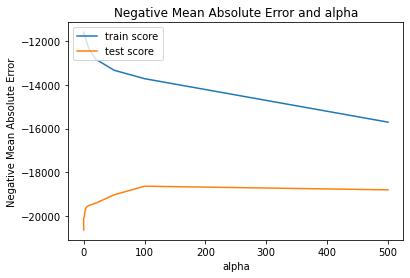

In [114]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### By the plot we can see that the optimal value of alpha is 100, the train score and test score combination score is highest at this point.

In [115]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.02283539e+02, -3.16248967e+03, -3.72649947e+02,  5.73168823e+03,
        9.57999445e+03,  4.38503341e+03,  2.45817068e+03,  2.44373899e+03,
        6.00043483e+03,  1.77068330e+03, -2.81681557e+01,  1.32472819e+03,
        3.18942387e+03,  5.70121956e+03,  5.41081642e+03, -2.84638197e+02,
        8.71222771e+03,  3.20801465e+03, -6.15406228e+02,  4.91372909e+03,
        3.56362243e+03, -1.20066479e+03, -3.48581821e+03,  5.83908459e+03,
        2.13555478e+03, -4.74025921e+02,  5.62932201e+03,  2.10950737e+03,
        2.85405617e+03,  1.53825940e+03, -8.94316911e+01,  2.69517280e+03,
        1.43430558e+03,  5.01698191e+02, -1.75710696e+02,  1.23818555e+03,
        2.95836398e+02, -2.45817068e+03,  1.66641073e+03,  4.53105997e+02,
        1.56312186e+03, -5.12480737e+02,  3.69607929e+03,  6.58478790e+02,
       -9.69470831e+01, -2.35317894e+03, -9.86405772e+02,  1.22263505e+03,
       -5.72906615e+02,  1.06171054e+03,  3.61198822e+03, -1.21463256e+03,
       -4.63017459e+02,  

## Evaluation of the model

In [116]:
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.919200242785809
0.814768808694343


## Lasso Regression

In [117]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.660965,0.104034,0.008829,0.001191,0.0001,{'alpha': 0.0001},-20479.509314,-19519.632561,-24067.805030,-18671.676475,...,-20207.896781,2070.899940,28,-11981.320213,-11531.613006,-11247.069169,-11580.197600,-11601.971631,-11588.434324,234.251683
1,0.555746,0.062104,0.009196,0.001602,0.001,{'alpha': 0.001},-20479.469472,-19519.390923,-24067.699615,-18671.684134,...,-20207.812173,2070.882594,27,-11981.317109,-11531.612253,-11247.066074,-11580.191977,-11601.972273,-11588.431937,234.251628
2,0.620763,0.080849,0.014197,0.006214,0.01,{'alpha': 0.01},-20479.071185,-19516.974548,-24066.643618,-18671.760629,...,-20206.965756,2070.708624,26,-11981.301416,-11531.607050,-11247.044869,-11580.137979,-11601.979471,-11588.414157,234.253260
3,0.667574,0.030626,0.009844,0.003627,0.05,{'alpha': 0.05},-20477.303258,-19506.235288,-24061.892915,-18670.737956,...,-20202.921157,2070.119197,25,-11981.267805,-11531.599634,-11247.001649,-11579.920399,-11602.016116,-11588.361121,234.256920
4,0.495567,0.026246,0.007000,0.000588,0.1,{'alpha': 0.1},-20475.099097,-19492.791625,-24055.830991,-18669.027258,...,-20197.753224,2069.408554,24,-11981.283815,-11531.595295,-11246.971194,-11579.729014,-11602.060883,-11588.328040,234.273292


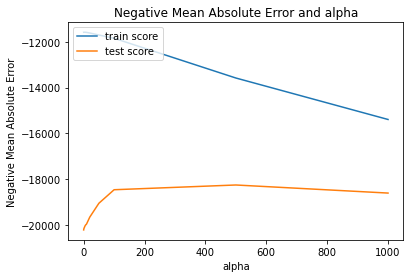

In [119]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### By the plot we can see that the optimal value of alpha is 100, the train score and test score combination score is highest at this point.

In [120]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [121]:
lasso.coef_

array([-4.48401250e+02, -4.61307465e+03,  7.89863373e+01,  1.27142467e+04,
        8.84051010e+03,  5.78493451e+03,  8.63163456e+03,  1.62184199e+03,
        5.34745901e+03,  4.06543701e+03,  0.00000000e+00, -0.00000000e+00,
        7.91453998e+03,  0.00000000e+00,  1.22996935e+03, -6.33414293e+02,
        2.52340125e+04,  1.91219594e+03, -2.54814532e+02,  3.96194528e+03,
        2.56719000e+03, -2.99531034e+03, -3.60858746e+03,  2.64768848e+03,
        9.87821946e+02, -1.90738469e+02,  4.73743714e+03,  6.35096347e+02,
        1.48036690e+03,  1.71102206e+03,  0.00000000e+00,  1.91839912e+03,
        1.13401292e+03,  7.58999479e+02,  3.36203896e+02,  7.23930520e+02,
       -6.41961747e+01, -3.58961611e+02,  3.12926810e+03,  8.11977965e+02,
        2.29930820e+03, -0.00000000e+00,  4.51945064e+03,  0.00000000e+00,
       -6.66767457e+02, -2.06225843e+02,  0.00000000e+00,  1.91502474e+02,
       -2.39716290e+03, -0.00000000e+00,  2.40509044e+03, -1.11007539e+03,
       -3.88167751e+02,  

## Evaluation of the model

In [122]:
# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9433923775680982
0.7107174598925705


In [123]:
#Select top features
coef = lasso.coef_

# sort using absolute value of coefficients in descending order
sorted(coef, key=abs,reverse=True)

[72411.92351043741,
 42923.205946027236,
 41152.60565773698,
 25234.01254129192,
 23027.841096992564,
 19470.762958569445,
 12714.246718548695,
 -12435.69508724666,
 -10699.65788820531,
 8840.510103008177,
 -8820.639050885851,
 -8683.594507830421,
 8631.634557181345,
 -8187.602543408368,
 7914.539982168015,
 -7024.374744094946,
 5785.884765705653,
 5784.934511327979,
 5347.4590058310605,
 5175.427517388226,
 5027.4699768209575,
 4741.463363050936,
 4737.437141654224,
 -4613.074651798433,
 4519.450643056777,
 4264.298017910454,
 4210.470268329411,
 4065.43701074746,
 3980.192394580416,
 3961.945281824581,
 3748.543828795692,
 -3608.587460224946,
 -3552.1526688333306,
 3321.445336912087,
 3129.26809689481,
 2996.2473938008447,
 -2995.3103421444807,
 2973.453982810496,
 2688.609041283459,
 2647.688479058487,
 -2619.3597636167538,
 2567.1900008581415,
 -2504.5673207071695,
 2405.0904449964128,
 -2397.162898978404,
 2396.253982107136,
 2299.3082023968655,
 2258.0418284350735,
 -2226.1242951

### The coeffieceints for the top 5 features are: 72410.00070878582, 42922.243899130444, 41145.65980155086, 25235.81953665492, 23027.238581376238, and these features affect the finalprice by as much value.